# Compañia de Telefonia



El propósito del proyecto es identificar cuál de los dos planes que maneja la compañía de telefonía genera más ingresos. Se realiza inicialmente un análisis exploratorio de los datos, después se hacen modificaciones/correcciones y se añaden nuevas columnas necesarias, y luego, con los datos limpios se procede a hacer el análisis a través de gráficos para finalmente probar la hipótesis y concluir los resultados.

## Inicialización

In [ ]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt


## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames

df_calls=pd.read_csv('/datasets/megaline_calls.csv') 

df_internet=pd.read_csv('/datasets/megaline_internet.csv') 

df_messages=pd.read_csv('/datasets/megaline_messages.csv')

df_plans=pd.read_csv('/datasets/megaline_plans.csv')

df_users=pd.read_csv('/datasets/megaline_users.csv') 

## Visualización inicial de los datos

In [ ]:
#Una vez cargados los DataFrames procedemos a revisar uno por uno, para identificar qué tipos de datos tienen y hacer correcciones mas adelante si es necesario

### Usuarios

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [ ]:
#Queremos saber si los usuarios llevan mas de un año con la compañia
df_users['reg_date'].max()

Timestamp('2018-12-31 00:00:00')

In [ ]:
df_users['reg_date'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
df_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

### Llamadas

In [ ]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
df_calls.sample(5)

,id,user_id,call_date,duration
19782,1076_56,1076,2018-09-14,14.28
110455,1389_550,1389,2018-10-27,5.68
63606,1231_320,1231,2018-07-11,8.85
22724,1082_851,1082,2018-08-03,2.13
3633,1014_56,1014,2018-12-14,0.00


In [ ]:
df_calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

### Mensajes

In [ ]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
df_messages.sample(5)

,id,user_id,message_date
30802,1193_584,1193,2018-08-26
45776,1312_260,1312,2018-07-14
41003,1264_52,1264,2018-12-17
15502,1101_559,1101,2018-11-17
34414,1215_328,1215,2018-09-25


In [ ]:
df_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

### Internet

In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
df_internet.sample(5)

,id,user_id,session_date,mb_used
94970,1443_40,1443,2018-11-30,175.53
25372,1117_305,1117,2018-12-05,599.99
102094,1489_106,1489,2018-10-05,0.00
24937,1114_349,1114,2018-12-24,65.64
14747,1067_67,1067,2018-12-09,241.90


In [ ]:
df_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

De esta primera parte se puede observar que solamente el DF de los usuarios contiene datos vacios, los cuales representan si el plan estaba o no activo en el momento en que se tomó la base de datos. Esa información no seria relevante en nuestro análisis por lo que se procederá a eliminar. Adicional, se transfomaran las fechas a tipo de dato datetime y se incluiran columnas en todos los DF para saber el mes de cada fecha. Para el DF de planes, se incluira una columna donde muestre los gb consumidos, dado que el cobro se hace en esta medida.

## Preparación de los datos


### Tarifas

#### Corregir datos

Para esta tabla no es necesario hacer ninguna correccion.

#### Enriquecer los datos

Se incluirá una columna en gb para poder ejecutar posteriormente de manera mas sencilla los cobros.

In [ ]:
df_plans['gb_per_month_included']=df_plans['mb_per_month_included']/1000
df_plans['gb_per_month_included']=np.floor(df_plans['gb_per_month_included'])


In [ ]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [ ]:
#se cambia el nombre de la columna plan_name a plan para que coincida con el DF de los usuarios

df_plans=df_plans.rename(columns={'plan_name': 'plan'})

df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


### Usuarios/as

#### Corregir los datos

In [ ]:
# Se cambiará el tipo de dato de la fecha de subcripcion de cada usuario por tipo datatime

df_users['reg_date']=pd.to_datetime(df_users['reg_date'], errors='coerce')

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


#### Enriquecer los datos

In [ ]:
# Se eliminará la columna "churn_date", porque considero que no es informacion relevante para lo que se nos solicita originalmente que es conocer el consumo por mes

df_users=df_users.drop(labels=['churn_date'], axis='columns')

In [ ]:
df_users.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 27.5+ KB


In [ ]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf


### Llamadas

#### Corregir los datos

In [ ]:
# Se cambiará el tipo de dato de la fecha en datatime

df_calls['call_date']=pd.to_datetime(df_calls['call_date'], errors='coerce')

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


#### Enriquecer los datos

In [ ]:
#Como se hizo anteriormente, se incluira la columna del mes que es la informacion que nos solicitan 
df_calls['month']=df_calls['call_date'].dt.month

df_calls

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


In [ ]:
#Se hace necesario redondear hacia arriba la duracion de las llamadas, ya que se cobran los minutos por llamada individual

df_calls['duration']=np.ceil(df_calls['duration'])

df_calls


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,11
137731,1499_200,1499,2018-10-20,11.0,10
137732,1499_201,1499,2018-09-21,9.0,9
137733,1499_202,1499,2018-10-10,1.0,10


### Mensajes

#### Corregir los datos

In [ ]:
#Se cambiara el tipo de dato de la fecha a datetime
df_messages['message_date']=pd.to_datetime(df_messages['message_date'], errors='coerce')

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


#### Enriquecer los datos

In [ ]:
#Se incluira una nueva columna con el mes respectivo

df_messages['month']=df_messages['message_date'].dt.month

df_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


### Internet

#### Corregir los datos

In [ ]:
#Se repite el mismo procedimiento para modificar el tipo de dato de la fecha

df_internet['session_date']=pd.to_datetime(df_internet['session_date'], errors='coerce')

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


#### Enriquecer los datos

In [ ]:
#como se hizo anteriormente, se incluira la columna del mes que es la informacion que nos solicitan 
df_internet['month']=df_internet['session_date'].dt.month

df_internet.tail()

,id,user_id,session_date,mb_used,month
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12
104824,1499_219,1499,2018-12-24,758.31,12


In [ ]:
# se incluye adicional otra columna que indique el consumo en gb
df_internet['gb_used']=(df_internet['mb_used']/1000)


df_internet

,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.08986
1,1000_204,1000,2018-12-31,0.00,12,0.00000
2,1000_379,1000,2018-12-28,660.40,12,0.66040
3,1000_413,1000,2018-12-26,270.99,12,0.27099
4,1000_442,1000,2018-12-27,880.22,12,0.88022
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,0.21806
104821,1499_216,1499,2018-12-30,304.72,12,0.30472
104822,1499_217,1499,2018-09-22,292.75,9,0.29275
104823,1499_218,1499,2018-12-07,0.00,12,0.00000


Del item 1.4 se concluye que se modificaron los datos para que las fechas quedaran en tupo datetime, adicional, se elimino una columna en el df_users porque no se considera relevante en el estudio y se redonderaon los valores de las llamadas para solo contar los minutos sin tener en cuenta los segundos.

## Estudiar las condiciones de las tarifas

In [ ]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


Se entiende que cobran por minuto y por gb usada al mes, las gb no se aproximan en cada dia porque se estaria estafando al usuario, mientras que las llamadas si se cobran por minuto independienemente si gasta 1s o 59s. Adicional a cada plan, hay tarifas extras, si el usuario excede el limite establecido para cada uno se le cobrará una tarifa adicional al pago mensual

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

#### Llamadas por usuario

In [ ]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

df_calls_month=df_calls.groupby(['user_id','month'])['id'].count().reset_index(name='number_of_calls')

df_calls_month

,user_id,month,number_of_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


#### Minutos por usuario

In [ ]:
### Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

df_duration_month= df_calls.groupby(['user_id','month'])['duration'].sum().reset_index(name='minutes_per_month')

df_duration_month

,user_id,month,minutes_per_month
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


#### Mensajes por usuario

In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

df_messages_month=df_messages.groupby(['user_id', 'month'])['user_id'].count().reset_index(name='msg_per_month')

df_messages_month

,user_id,month,msg_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


#### Internet  por usuario

In [ ]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

df_internet_month=df_internet.groupby(['user_id','month'])['gb_used'].sum().reset_index(name='gb_per_month')

#Se redondean hacia arriba los valores de gb consumidos mensualmente para cada usuario

df_internet_month['gb_per_month']=np.ceil(df_internet_month['gb_per_month'])

df_internet_month

,user_id,month,gb_per_month
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,23.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,24.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


In [ ]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

df_consumption_per_user=df_calls_month.merge(df_messages_month, on=['user_id','month'],how='left')
df_consumption_per_user=df_consumption_per_user.merge(df_internet_month, on=['user_id','month'],how='left')
df_consumption_per_user=df_consumption_per_user.merge(df_duration_month, on=['user_id','month'],how='left')

df_consumption_per_user

,user_id,month,number_of_calls,msg_per_month,gb_per_month,minutes_per_month
0,1000,12,16,11.0,2.0,124.0
1,1001,8,27,30.0,7.0,182.0
2,1001,9,49,44.0,14.0,315.0
3,1001,10,65,53.0,23.0,393.0
4,1001,11,64,36.0,19.0,426.0
...,...,...,...,...,...,...
2253,1498,12,39,NaN,24.0,339.0
2254,1499,9,41,NaN,13.0,346.0
2255,1499,10,53,NaN,20.0,385.0
2256,1499,11,45,NaN,17.0,308.0


In [ ]:
# Se compruba cuales y cuantos valores ausentes tenemos
df_consumption_per_user.isna().sum()

user_id                0
month                  0
number_of_calls        0
msg_per_month        485
gb_per_month          15
minutes_per_month      0
dtype: int64

### Consumo de todos los servicios por usuario al mes

In [ ]:
#Se llenan los valores vacios con cero porque significa que el usuario no usó ese servicio ese mes

df_consumption_per_user= df_consumption_per_user.fillna(0)
df_consumption_per_user

,user_id,month,number_of_calls,msg_per_month,gb_per_month,minutes_per_month
0,1000,12,16,11.0,2.0,124.0
1,1001,8,27,30.0,7.0,182.0
2,1001,9,49,44.0,14.0,315.0
3,1001,10,65,53.0,23.0,393.0
4,1001,11,64,36.0,19.0,426.0
...,...,...,...,...,...,...
2253,1498,12,39,0.0,24.0,339.0
2254,1499,9,41,0.0,13.0,346.0
2255,1499,10,53,0.0,20.0,385.0
2256,1499,11,45,0.0,17.0,308.0


In [ ]:
# Se verifica que el data Frame no tenga valores ausentes

df_consumption_per_user.isna().sum()

user_id              0
month                0
number_of_calls      0
msg_per_month        0
gb_per_month         0
minutes_per_month    0
dtype: int64

### Servicios extras por usuario 

In [ ]:
#Se combinan los data frame de usuarios y consumo de todos los servicios por mes para poder calcular el total en USD que debe pagar cada usuario 

df_consumption_per_plan=df_consumption_per_user.merge(df_users, on='user_id', how='left')

df_consumption_per_plan=df_consumption_per_plan.merge(df_plans, on='plan', how='outer')

df_consumption_per_plan.head()

,user_id,month,number_of_calls,msg_per_month,gb_per_month,minutes_per_month,first_name,last_name,age,city,reg_date,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12,16,11.0,2.0,124.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
1,1006,11,2,15.0,3.0,10.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
2,1006,12,9,139.0,33.0,59.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
3,1008,10,71,21.0,18.0,476.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
4,1008,11,63,37.0,24.0,446.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0


In [ ]:
#Se verifica para cada usuario y mes cuales de los servicios tienen un consumo extra al plan establecido para cada usuario

df_consumption_per_plan['extra_messages']= df_consumption_per_plan['msg_per_month']-df_consumption_per_plan['messages_included']
df_consumption_per_plan['extra_minutes']= df_consumption_per_plan['minutes_per_month']-df_consumption_per_plan['minutes_included']
df_consumption_per_plan['extra_internet']= df_consumption_per_plan['gb_per_month']-df_consumption_per_plan['gb_per_month_included']

df_consumption_per_plan.sample(5)

,user_id,month,number_of_calls,msg_per_month,gb_per_month,minutes_per_month,first_name,last_name,age,city,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_messages,extra_minutes,extra_internet
456,1351,11,27,18.0,24.0,135.0,Kyle,Grimes,47,"San Antonio-New Braunfels, TX MSA",...,30720,3000,70,7,0.01,0.01,30.0,-982.0,-2865.0,-6.0
630,1454,8,35,78.0,24.0,305.0,Kymberly,Cohen,56,"San Antonio-New Braunfels, TX MSA",...,30720,3000,70,7,0.01,0.01,30.0,-922.0,-2695.0,-6.0
2010,1400,11,78,0.0,12.0,581.0,Kenton,Hickman,72,"Riverside-San Bernardino-Ontario, CA MSA",...,15360,500,20,10,0.03,0.03,15.0,-50.0,81.0,-3.0
306,1211,11,52,55.0,28.0,319.0,Vito,Cameron,60,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,30720,3000,70,7,0.01,0.01,30.0,-945.0,-2681.0,-2.0
605,1435,12,40,150.0,27.0,331.0,Darnell,Powell,23,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",...,30720,3000,70,7,0.01,0.01,30.0,-850.0,-2669.0,-3.0


In [ ]:
#Los valores que estan negativos indican que la persona no tuvo un consumo extra en el servicio, por lo tanto debe sustituirse por un cero para que no haya un cobro adiciona

df_consumption_per_plan['extra_messages']=df_consumption_per_plan['extra_messages'].where(df_consumption_per_plan['extra_messages']>=0,0)
df_consumption_per_plan['extra_minutes']=df_consumption_per_plan['extra_minutes'].where(df_consumption_per_plan['extra_minutes']>=0,0)
df_consumption_per_plan['extra_internet']=df_consumption_per_plan['extra_internet'].where(df_consumption_per_plan['extra_internet']>=0,0)


df_consumption_per_plan.sample(5)

,user_id,month,number_of_calls,msg_per_month,gb_per_month,minutes_per_month,first_name,last_name,age,city,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_messages,extra_minutes,extra_internet
1355,1201,9,57,4.0,26.0,413.0,Jeanelle,Estrada,61,"Bridgeport-Stamford-Norwalk, CT MSA",...,15360,500,20,10,0.03,0.03,15.0,0.0,0.0,11.0
409,1283,12,122,117.0,34.0,932.0,Alan,Burgess,38,"Charleston-North Charleston, SC MSA",...,30720,3000,70,7,0.01,0.01,30.0,0.0,0.0,4.0
209,1144,10,80,72.0,39.0,583.0,Kaycee,Peterson,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,30720,3000,70,7,0.01,0.01,30.0,0.0,0.0,9.0
1214,1156,11,85,0.0,19.0,645.0,Anette,Chambers,71,"Albuquerque, NM MSA",...,15360,500,20,10,0.03,0.03,15.0,0.0,145.0,4.0
352,1237,10,105,36.0,12.0,743.0,Leighann,Wheeler,50,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,30720,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0


## Base de datos compilada

In [ ]:
# Calcula el ingreso mensual para cada usuario

df_consumption_per_plan['monthly_cost']= df_consumption_per_plan['usd_monthly_pay'] + (df_consumption_per_plan['usd_per_gb'] * df_consumption_per_plan['extra_internet']) + (df_consumption_per_plan['usd_per_message'] *df_consumption_per_plan['extra_messages'])+(df_consumption_per_plan['usd_per_minute']*df_consumption_per_plan['extra_minutes'])

df_consumption_per_plan.tail()

,user_id,month,number_of_calls,msg_per_month,gb_per_month,minutes_per_month,first_name,last_name,age,city,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_messages,extra_minutes,extra_internet,monthly_cost
2253,1498,12,39,0.0,24.0,339.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,500,20,10,0.03,0.03,15.0,0.0,0.0,9.0,110.0
2254,1499,9,41,0.0,13.0,346.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.0,20.0
2255,1499,10,53,0.0,20.0,385.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,500,20,10,0.03,0.03,15.0,0.0,0.0,5.0,70.0
2256,1499,11,45,0.0,17.0,308.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,500,20,10,0.03,0.03,15.0,0.0,0.0,2.0,40.0
2257,1499,12,65,0.0,23.0,496.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,500,20,10,0.03,0.03,15.0,0.0,0.0,8.0,100.0


## Estudia el comportamiento de usuario

Se calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. La tarea principal es comparar las tarifas y decidir cuál es más rentable



In [ ]:
df_consumption_per_plan.columns

Index(['user_id', 'month', 'number_of_calls', 'msg_per_month', 'gb_per_month',
       'minutes_per_month', 'first_name', 'last_name', 'age', 'city',
       'reg_date', 'plan', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'gb_per_month_included', 'extra_messages',
       'extra_minutes', 'extra_internet', 'monthly_cost'],
      dtype='object')

In [ ]:
df_consumption_per_plan.describe()

,user_id,month,number_of_calls,msg_per_month,gb_per_month,minutes_per_month,age,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_messages,extra_minutes,extra_internet,monthly_cost
count,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000
mean,1247.175819,9.167405,60.998671,33.053587,17.236050,435.937555,45.353853,349.977857,20210.168291,1289.415412,35.788308,9.052702,0.023685,0.023685,19.736492,4.778122,42.814438,2.919841,66.054438
std,143.344211,2.495785,31.770869,34.149535,7.834497,231.972343,16.782725,441.677081,7141.221012,1162.308107,23.246162,1.394770,0.009298,0.009298,6.973849,16.511913,108.503428,4.933519,46.676511
min,1000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,18.000000,50.000000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,15.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,8.000000,39.000000,3.000000,13.000000,275.000000,30.000000,50.000000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,15.000000,0.000000,0.000000,0.000000,25.512500
50%,1246.000000,10.000000,60.000000,25.000000,17.000000,429.000000,46.000000,50.000000,15360.000000,500.000000,20.000000,10.000000,0.030000,0.030000,15.000000,0.000000,0.000000,0.000000,70.000000
75%,1370.000000,11.000000,80.000000,50.750000,21.000000,574.750000,61.000000,1000.000000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,30.000000,0.000000,1.000000,5.000000,70.000000
max,1499.000000,12.000000,205.000000,266.000000,71.000000,1510.000000,75.000000,1000.000000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,30.000000,216.000000,1010.000000,56.000000,600.370000


In [ ]:
#queremos saber cuantos usuarios hay en cada plan y como van cambiando segun el tiempo
number_users= df_consumption_per_plan.groupby(['plan', 'month'])['user_id'].count().unstack()
number_users

month,1,2,3,4,5,6,7,8,9,10,11,12
plan,,,,,,,,,,,,
surf,2,9,23,50,75,96,120,159,191,232,277,311
ultimate,4,6,12,21,29,45,59,71,86,105,126,149


### Llamadas

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

df_mean_calls= df_consumption_per_plan.groupby(['plan','month'])['number_of_calls'].mean().reset_index(name='mean_calls')

df_mean_calls

,plan,month,mean_calls
0,surf,1,30.000000
1,surf,2,40.666667
2,surf,3,46.434783
3,surf,4,48.880000
4,surf,5,57.186667
5,surf,6,60.093750
6,surf,7,63.683333
7,surf,8,58.647799
8,surf,9,59.020942
9,surf,10,61.650862


In [ ]:
#Se realiza una tabla dinamica para facilitar la comprension de la informacion, ya que facilita tener las dos columnas de los planes
df_pivot_mean_calls=df_mean_calls.pivot_table(index='month', columns='plan', values='mean_calls')
df_pivot_mean_calls

plan,surf,ultimate
month,,
1,30.000000,28.000000
2,40.666667,68.000000
3,46.434783,46.000000
4,48.880000,47.523810
5,57.186667,57.586207
6,60.093750,54.488889
7,63.683333,58.694915
8,58.647799,60.070423
9,59.020942,61.046512


#### Grafico promedio llamadas

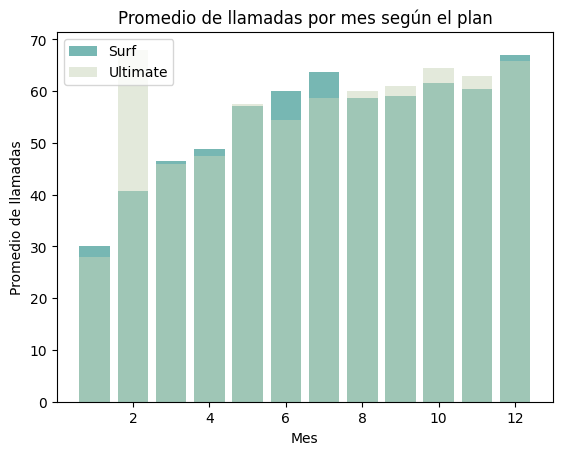

In [ ]:
plt.bar(df_pivot_mean_calls.index, df_pivot_mean_calls['surf'], color='#68b0ab', alpha=0.9,label='Surf')

plt.bar(df_pivot_mean_calls.index, df_pivot_mean_calls['ultimate'], color='#c8d5b9', alpha=0.5, label='Ultimate')

plt.xlabel("Mes")
plt.ylabel("Promedio de llamadas")
plt.title("Promedio de llamadas por mes según el plan")
plt.legend()
plt.show()

Como se pude observar, el comportamiento del promedio de las llamadas para ambos planes tiende a ser similiar en todos los meses, a diferencia del mes 2 donde se evidencia un gran aumento en las llamadas del plan ultimate

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

df_total_minutes= df_consumption_per_plan.groupby(['plan', 'month'])['minutes_per_month'].sum().reset_index(name='sum_minutes')
df_total_minutes

,plan,month,sum_minutes
0,surf,1,406.0
1,surf,2,2673.0
2,surf,3,7590.0
3,surf,4,17577.0
4,surf,5,30768.0
5,surf,6,41836.0
6,surf,7,54448.0
7,surf,8,66438.0
8,surf,9,80360.0
9,surf,10,101846.0


In [ ]:
#Se realiza una tabla dinamica para facilitar la comprension de la informacion, ya que facilita tener las dos columnas de los planes
df_pivot_sum_minutes=df_total_minutes.pivot_table(index='month', columns='plan', values='sum_minutes')
df_pivot_sum_minutes

plan,surf,ultimate
month,,
1,406.0,774.0
2,2673.0,2822.0
3,7590.0,3651.0
4,17577.0,7074.0
5,30768.0,11781.0
6,41836.0,17435.0
7,54448.0,25197.0
8,66438.0,29922.0
9,80360.0,37626.0


#### Grafico consumo de minutos al mes por plan

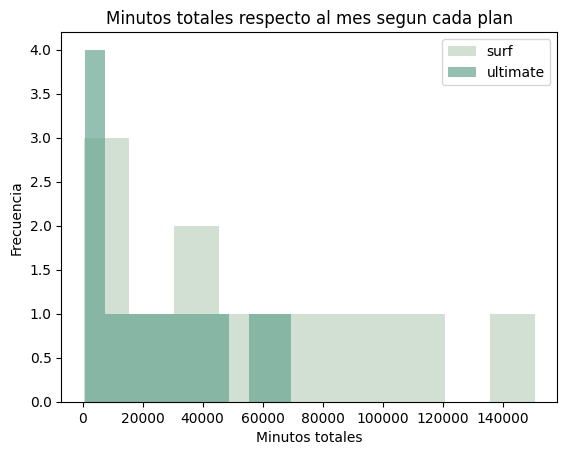

In [ ]:
plt.hist(df_pivot_sum_minutes['surf'], bins=10, alpha=0.7, color=['#bfd3c1'], label='surf')

plt.hist(df_pivot_sum_minutes['ultimate'], bins=10, alpha=0.7, color=['#68a691'], label='ultimate')

plt.xlabel("Minutos totales")
plt.ylabel("Frecuencia")
plt.title("Minutos totales respecto al mes segun cada plan")
plt.legend()

plt.show()

Se evidencia que los usuarios del plan surf tienden a cambiar la cantidad de minutos al mes, sin embargo, se puede observar que hubo 2 meses donde acumularon el mismo rango de minutos entre 0-1800 aprox y  tres meses donde acumularon entre 3000-5000. Para el plan ultimate se ve solo 1 tendencia significativa, los usuarios durante 4 meses sumaron entre 0-1000 minutos, los demas meses tuvieron un comportamiento diferente. En conclusion, los usuarios del plan surf tienen a consumir mas minutos que los del plan ultimate, lo que podria tener sentido porque la cantidad de usuarios del plan surf duplica la cantidad de usuarios del otro plan.

#### Media y Varianza para llamadas

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_call_surf =df_pivot_sum_minutes['surf'].mean()
var_call_surf =df_pivot_sum_minutes['surf'].var()

mean_call_ultimate =df_pivot_sum_minutes['ultimate'].mean()
var_call_ultimate =df_pivot_sum_minutes['ultimate'].var()


print (f"Media de las llamadas para el plan surf: {mean_call_surf} y la varianza es: {var_call_surf}") 
print (f"Media de las llamadas para el plan ultimate :{mean_call_ultimate} y la varianza es: {var_call_ultimate}") 


Media de las llamadas para el plan surf: 56201.916666666664 y la varianza es: 2402963284.9924245
Media de las llamadas para el plan ultimate :25827.0 y la varianza es: 521959518.54545456


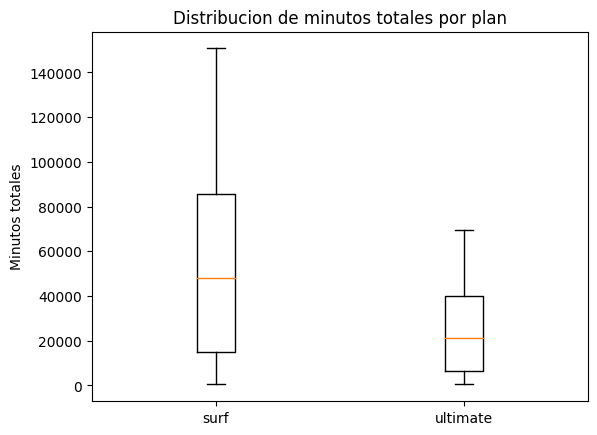

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.boxplot([df_pivot_sum_minutes['surf'],df_pivot_sum_minutes['ultimate']],labels=['surf','ultimate'])
             
plt.title('Distribucion de minutos totales por plan')
plt.ylabel('Minutos totales')
             
plt.show()


Efectivamente el comportamiento de los usuarios varia segun el plan, las medias para cada uno son diferentes. Adicional el inervalo intercuartilico nos muestra que hay mas usuarios en el plan surf que en el plan ultimate. El plan surf tiene valores maximos que pueden afectar el promedio y dar una sensacion falsa de que ambos planes se comportan igual dado que tienen promedios de llamadas muy parecidos, pero la realidad es que los datos se comportan de manera diferente.

### Mensajes

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

#Se agrupan primero los datos y se crea la nueva columna que contenga el valor de la cantidad de mensajes enviados en el mes para cada plan,
#luego se llama a la tabla dinamica para visualizar y graficas de una forma mas facil

df_messages_plan= df_consumption_per_plan.groupby(['plan','month'])['msg_per_month'].sum().reset_index(name='number_of_messages')

df_messages_plan_pivot=df_messages_plan.pivot_table(index='month', columns='plan',values='number_of_messages')

df_messages_plan_pivot

plan,surf,ultimate
month,,
1,21.0,62.0
2,108.0,139.0
3,351.0,243.0
4,870.0,463.0
5,1829.0,931.0
6,2427.0,1374.0
7,3243.0,1937.0
8,4588.0,2732.0
9,5802.0,3259.0


#### Grafico de mensajes enviados por mes segun el plan 

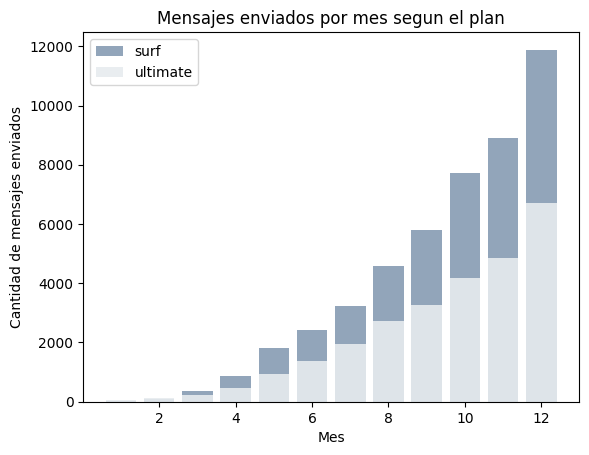

In [ ]:
plt.bar(df_messages_plan_pivot.index, df_messages_plan_pivot['surf'], alpha=0.5, color='#274c77', label='surf')

plt.bar(df_messages_plan_pivot.index, df_messages_plan_pivot['ultimate'], alpha=0.9, color='#e7ecef', label='ultimate')

plt.xlabel('Mes')
plt.ylabel('Cantidad de mensajes enviados')
plt.title('Mensajes enviados por mes segun el plan')
plt.legend()
plt.show()

Se evidencia que los usuarios han incrementado de forma exponencial para ambos planes el uso de los mensajes. Los usuarios del plan surf tienden a doblar la cantidad de mensajes enviados que los del plan ultimate. Esto se relaciona con que a medida que incrementa el tiempo, los usuarios se han ido inscribiendo en la compañia de telefonía. Para el mes de enero la cantidad de ususarios era realmente minima para ambos planes y al mes de diciembre ese valor se incrementó.

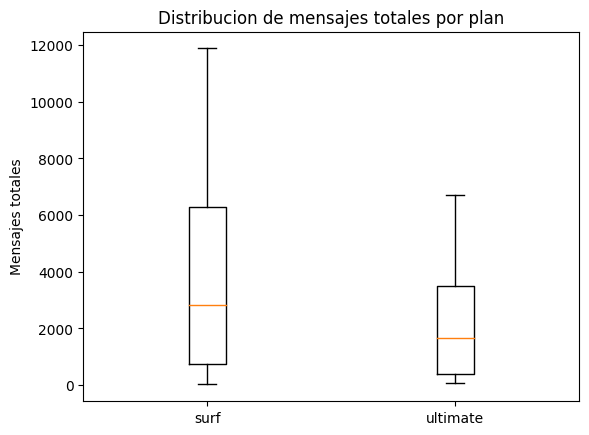

In [ ]:
plt.boxplot([df_messages_plan_pivot['surf'],df_messages_plan_pivot['ultimate']],labels=['surf','ultimate'])
             
plt.title('Distribucion de mensajes totales por plan')
plt.ylabel('Mensajes totales')
             
plt.show()

Las distribuciones tienden a ser muy parecidas a las obtenidas para las llamadas, esto esta influenciado por la cantidad de usuarios para cada plan.

### Internet

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

df_gb_user=df_consumption_per_plan.groupby(['plan','user_id'])['gb_per_month'].sum().reset_index(name='gb_per_user') 
df_gb_user


,plan,user_id,gb_per_user
0,surf,1001,83.0
1,surf,1002,42.0
2,surf,1003,28.0
3,surf,1004,159.0
4,surf,1005,18.0
...,...,...,...
476,ultimate,1482,22.0
477,ultimate,1487,14.0
478,ultimate,1490,194.0
479,ultimate,1493,79.0


In [ ]:
#Queremos saber cuales de los usuarios estan en el plan surf y consumen internet y cuales estan el plan ultimate que tambien consumen internet
df_gb_user_surf= df_gb_user[df_gb_user['plan']=='surf']
df_gb_user_surf

,plan,user_id,gb_per_user
0,surf,1001,83.0
1,surf,1002,42.0
2,surf,1003,28.0
3,surf,1004,159.0
4,surf,1005,18.0
...,...,...,...
321,surf,1494,95.0
322,surf,1495,100.0
323,surf,1496,67.0
324,surf,1498,232.0


In [ ]:
df_gb_user_ultimate= df_gb_user[df_gb_user['plan']=='ultimate']
df_gb_user_ultimate

,plan,user_id,gb_per_user
326,ultimate,1000,2.0
327,ultimate,1006,36.0
328,ultimate,1008,57.0
329,ultimate,1011,136.0
330,ultimate,1013,21.0
...,...,...,...
476,ultimate,1482,22.0
477,ultimate,1487,14.0
478,ultimate,1490,194.0
479,ultimate,1493,79.0


In [ ]:
# Se realiza una comprobacion de que el filtro que estamos colocando arriba si funcione, como vemos,
#para el usuario 1006 se evidencia consumo de 2 meses, para un total de 36gb. Es tal cual nos muestra la tabla de arriba
df_consumption_per_plan.query("user_id==1006")['gb_per_month']

1     3.0
2    33.0
Name: gb_per_month, dtype: float64

#### Grafico de consumo de internet por usuario segun el plan

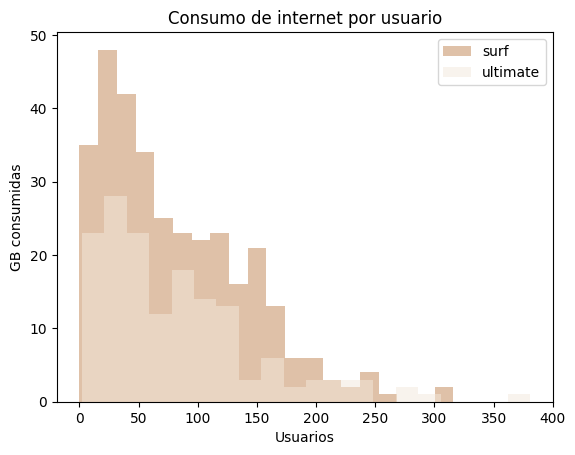

In [ ]:
plt.hist(df_gb_user_surf['gb_per_user'], bins=20, alpha=0.5, color='#c08552', label='surf')

plt.hist(df_gb_user_ultimate['gb_per_user'], bins=20, alpha=0.5, color='#f3e9dc', label='ultimate')

plt.xlabel('Usuarios')
plt.ylabel('GB consumidas')
plt.title('Consumo de internet por usuario')
plt.legend()
plt.show()

Los picos para ambos histogramas tienden a mostrar que los usuarios suelen consumir casi 50gb para el plan surf y mas de 20gb para el plan ultimate. El comportamiento tiende a ser muy similar, los dos graficos muentran una distribucion a la derecha.

## Ingreso

In [ ]:
#Queremos saber en que plan se generan mas ingresos en promedio

df_income_plan=df_consumption_per_plan.groupby('plan')['monthly_cost'].mean().reset_index(name='total_cost')

df_income_plan

,plan,total_cost
0,surf,63.005773
1,ultimate,72.660589


In [ ]:
df_income_plan=df_consumption_per_plan.groupby('plan')['monthly_cost'].sum().reset_index(name='total_cost')

df_income_plan

,plan,total_cost
0,surf,97343.92
1,ultimate,51807.00


In [ ]:
df_income_plan=df_consumption_per_plan.groupby(['plan','month'])['monthly_cost'].mean().reset_index(name='total_cost')

df_income_plan

,plan,month,total_cost
0,surf,1,20.000000
1,surf,2,37.730000
2,surf,3,48.115217
3,surf,4,42.110600
4,surf,5,50.898267
5,surf,6,51.664583
6,surf,7,66.446333
7,surf,8,67.653145
8,surf,9,59.913455
9,surf,10,67.468276


In [ ]:
df_income_plan_pivot=df_income_plan.pivot_table(index='month',columns='plan',values='total_cost')
df_income_plan_pivot

plan,surf,ultimate
month,,
1,20.000000,70.000000
2,37.730000,70.000000
3,48.115217,75.833333
4,42.110600,73.666667
5,50.898267,70.965517
6,51.664583,71.866667
7,66.446333,72.135593
8,67.653145,73.450704
9,59.913455,72.360465


#### Grafico de ingresos promedio por mes segun el plan

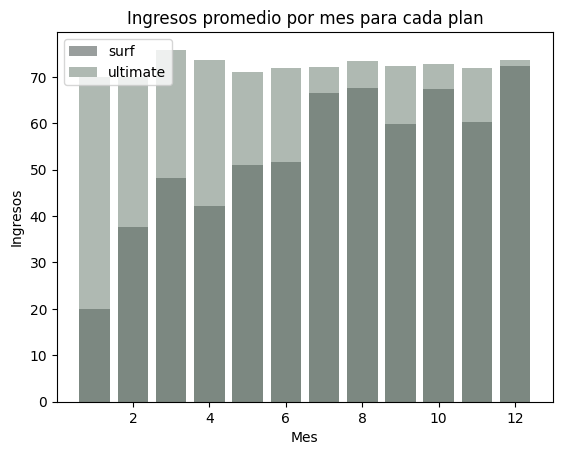

In [ ]:
plt.bar(df_income_plan_pivot.index, df_income_plan_pivot['surf'], alpha=0.5, color='#343e3d', label='surf')

plt.bar(df_income_plan_pivot.index, df_income_plan_pivot['ultimate'], alpha=0.5, color='#607466', label='ultimate')

plt.xlabel("Mes")
plt.ylabel("Ingresos")
plt.legend()
plt.title("Ingresos promedio por mes para cada plan")

plt.show()


Los primeros meses del mes se observa que el plan ultimate generaba mas ingresos, pero despues del mes 6 se evidencia que los planes tienden a generar ingresos parecidos. El comportamiento del plan surf se mantuvo constante en todo el año

In [ ]:
#Queremos saber qué servicio genera mas ingresos segun el plan 

df_extra_internet_income=df_consumption_per_plan.groupby('plan')['extra_internet'].sum().reset_index(name='total_income')
df_extra_internet_income

,plan,total_income
0,surf,6322.0
1,ultimate,271.0


In [ ]:

df_extra_messages_income=df_consumption_per_plan.groupby('plan')['extra_messages'].sum().reset_index(name='total_income')
df_extra_messages_income

,plan,total_income
0,surf,10789.0
1,ultimate,0.0


In [ ]:
df_extra_minutes_income=df_consumption_per_plan.groupby('plan')['extra_minutes'].sum().reset_index(name='total_income')
df_extra_minutes_income

,plan,total_income
0,surf,96675.0
1,ultimate,0.0


In [ ]:
Evidentemente el plan surf genera mas ingresos en servicios extras a los que vienen incluidos en el plan

## Prueba las hipótesis estadísticas

### Hipotesis 1

H0=Los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf NO son iguales
H1=Los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf SI son iguales

Para este tipo de hipotesis se ha decidio usar una prueba t-student para muestras independientes, ya que es la me ayuda a corroborar si una media es igual o no a otra

In [ ]:
# Prueba las hipótesis

#Se extrae la informacion de los costos generados en las llamadas para el plan surf
df_extra_minutes_income_surf=df_consumption_per_plan.query("plan=='surf'")
df_extra_minutes_income_surf=df_extra_minutes_income_surf.groupby('month')['extra_minutes'].mean().reset_index(name='total_mean')
df_extra_minutes_income_surf

,month,total_mean
0,1,0.000000
1,2,34.555556
2,3,23.565217
3,4,35.280000
4,5,56.760000
5,6,53.927083
6,7,73.883333
7,8,56.113208
8,9,48.617801
9,10,61.099138


In [ ]:
df_extra_minutes_income_ultimate=df_consumption_per_plan.query("plan=='ultimate'")
df_extra_minutes_income_ultimate=df_extra_minutes_income_ultimate.groupby('month')['extra_minutes'].mean().reset_index(name='total_mean')
df_extra_minutes_income_ultimate

,month,total_mean
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
6,7,0.0
7,8,0.0
8,9,0.0
9,10,0.0


El plan ultimate no genera ingresos extra para las llamadas, por lo que los valores para cada plan son diferentes.

### Hipotesis 2 

H0=El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones
H1=El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

Para este tipo de hipotesis se ha decidio usar una prueba t-student para muestras independientes, ya que es la me ayuda a corroborar si una media es igual o no a otra

In [ ]:
#se extrae la informacion necesaria
df_city=df_consumption_per_plan.groupby('city')['monthly_cost'].sum().reset_index(name='total_income')
df_city
#New York-Newark-Jersey City, NY-NJ-PA MSA

,city,total_income
0,"Albany-Schenectady-Troy, NY MSA",761.10
1,"Albuquerque, NM MSA",1008.25
2,"Atlanta-Sandy Springs-Roswell, GA MSA",3550.40
3,"Austin-Round Rock-Georgetown, TX MSA",1419.21
4,"Bakersfield, CA MSA",430.00
...,...,...
68,"Tucson, AZ MSA",650.00
69,"Tulsa, OK MSA",720.43
70,"Urban Honolulu, HI MSA",2441.58
71,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",397.00


In [ ]:
# Prueba las hipótesis
#se separan los datos de la ciudad solicitada y el resto de ciudades
ny_nj_income=df_city[df_city['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_income']
other_city_income=df_city[df_city['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_income']

In [ ]:
popmean=ny_nj_income.mean()
popmean

22856.330000000013

In [ ]:
#Se comprueba que tan cerca esta la media de los datos de las demas ciudades de la ciudad de NY/NJ
results=st.ttest_1samp(other_city_income,popmean)

print(results.pvalue)


9.821253505962181e-83


El resultado anterior es menor a alpha=0.05, lo que indica que rechazamos la hipotesis nula, indicando que el ingreso no es similar entre ciudades

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

La conclusion general indica que el plan que genera mas ingresos es el plan surf, primero porque hay mas usuarios inscritos y segundo porque genera mas ingresos en extra costos de los servicios que utilizan demas los usuarios.

Los primeros meses del mes se observó que el plan ultimate generaba mas ingresos, pero despues del mes 6 se evidencia que los planes tienden a generar ingresos parecidos. El comportamiento del plan surf se mantuvo constante en todo el año

EL ingreso de los usuarios por ciudad no es similar entre ciudades, varia depende de la region.

Se evidenció que los usuarios incrementaron de forma exponencial para ambos planes el uso de los mensajes. Los usuarios del plan surf tienden a doblar la cantidad de mensajes enviados que los del plan ultimate. Esto se relaciona con que, a medida que incrementa el tiempo, los usuarios se han ido inscribiendo en la compañia de telefonía. Para el mes de enero la cantidad de ususarios era realmente minima para ambos planes y al mes de diciembre ese valor se incrementó.